<a href="https://colab.research.google.com/github/frogbysachs/LASA-Data-Science/blob/main/FrogSachU9Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unit 9 Project: Hazelnut colors
For this final project, I decided to use some data I've been eyeing for a while: the effect of roasting on the color that a hazelnut takes on. Sounds random, is random. I think it'll be kind of cool, though.

#Precursor (the other dataset I tried)
Before I even get to importing libraries, I want to acknowledge that I started this project on a very different note: I was planning to look at categorical data about German schoolteachers and Nazi party membership. At first, I wanted to just do another BART model, but after getting through with that, I realized it was so similar to what I did last unit that there was really no point.

So then I switched to doing a NN model for that same data, and this is what I got as my model:
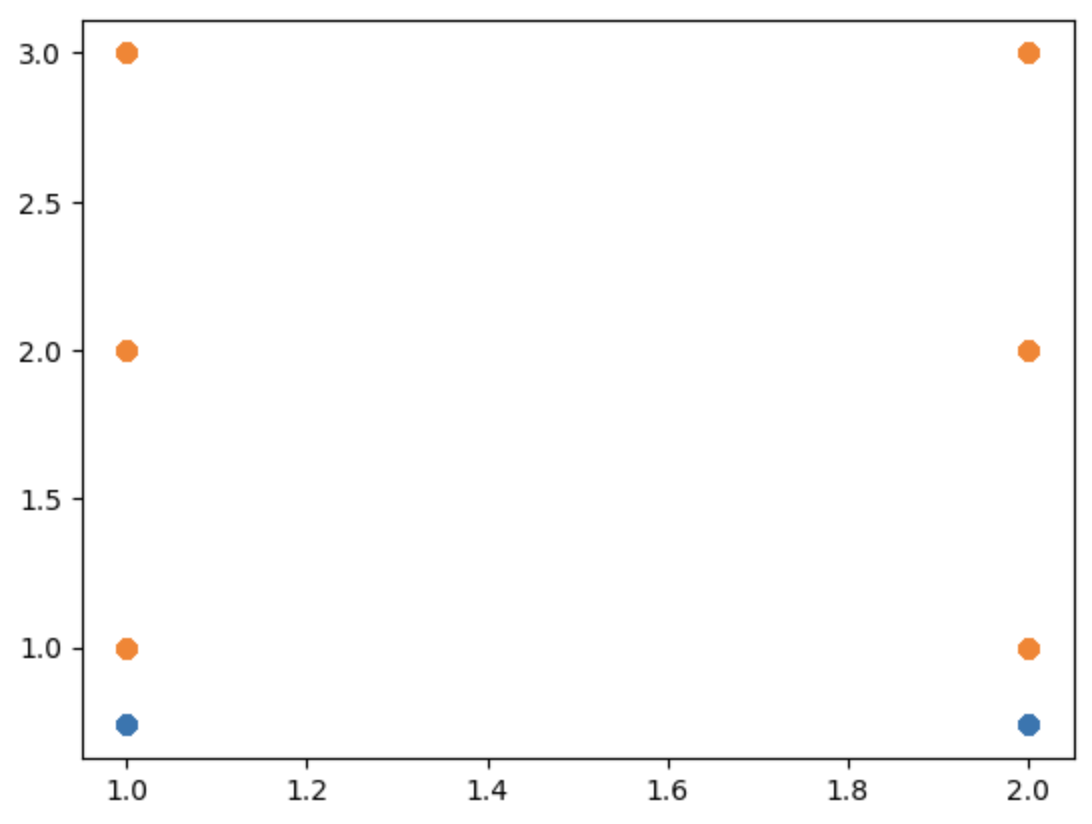

Not awesome. So now I'm starting fresh with the same NN model I used before, but different (*non-categorical*) data to work with. I'll link the other editions of this project at the bottom so you can see former versions if you want.

##Importing libraries

In [29]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Data formatting
Some notes about what this data *is*: there are three separate hazelnut varieties: Fosa, Palaz, and Tombul hazelnuts. There are also two forms a hazelnut can take: whole (W), or ground (G).

For each hazelnut variety and form, these researchers recorded the mean difference in color (according to some metric that I don't really understand, but I think lower=darker), as well as the standard deviation of that mean.

In [30]:
#importing my full dataframe, taken from users.stat.ufl.edu
dataframe1 = pd.read_csv("https://raw.githubusercontent.com/frogbysachs/LASA-Data-Science/refs/heads/main/hazelnut_color.csv")
dataframe1

,Process,tempC,minutes,fosaWmn,fosaWsd,fosaGmn,fosaGsd,palazWmn,palazWsd,palazGmn,palazGsd,tombulWmn,tombulWsd,tombulGmn,tombulGsd
0,1,0,0,82.56,1.22,81.66,2.18,78.39,1.86,81.88,1.65,82.96,1.35,79.90,0.25
1,2,125,15,81.05,1.43,74.14,0.40,79.46,0.46,74.65,1.61,78.32,0.41,72.72,0.28
2,3,125,25,76.81,1.58,74.90,0.59,75.97,1.32,74.12,1.51,76.83,1.21,71.69,0.21
3,4,125,35,76.32,1.99,74.59,1.05,74.27,2.06,72.48,0.93,74.75,0.94,70.99,0.39
4,5,125,45,74.56,1.80,72.63,0.58,73.60,1.66,71.03,0.83,72.71,0.92,70.01,0.22
5,6,125,55,73.55,1.65,72.22,0.67,72.08,0.40,70.43,0.52,70.44,1.29,69.14,0.30
6,7,135,13,79.33,0.91,75.36,1.32,78.77,0.62,73.46,1.88,77.69,0.67,72.23,0.25
7,8,135,22,78.51,1.21,73.63,0.79,76.00,1.06,71.75,0.81,76.98,0.68,71.60,0.22
8,9,135,31,75.70,1.08,72.13,0.40,75.24,1.12,71.57,0.60,75.93,1.62,71.05,0.55
9,10,135,40,73.84,1.82,70.65,0.91,74.24,0.70,70.03,1.23,71.81,0.59,68.58,0.63


For this project, I'm just going to look at Fosa hazelnuts, using tempC, minutes, and fosaGmn to predict fosaWmn.

In [31]:
dataframe1.drop(columns=["Process","palazWmn","palazWsd","palazGmn","palazGsd","tombulWmn","tombulWsd","tombulGsd","tombulGmn"],inplace=True)
dataframe1

,tempC,minutes,fosaWmn,fosaWsd,fosaGmn,fosaGsd
0,0,0,82.56,1.22,81.66,2.18
1,125,15,81.05,1.43,74.14,0.40
2,125,25,76.81,1.58,74.90,0.59
3,125,35,76.32,1.99,74.59,1.05
4,125,45,74.56,1.80,72.63,0.58
5,125,55,73.55,1.65,72.22,0.67
6,135,13,79.33,0.91,75.36,1.32
7,135,22,78.51,1.21,73.63,0.79
8,135,31,75.70,1.08,72.13,0.40
9,135,40,73.84,1.82,70.65,0.91


In [32]:
#ensuring that none of my data is NaNs (because this is a very real problem that I ran into for a long time)
nan_mask = np.isnan(dataframe1)
print(nan_mask)

    tempC  minutes  fosaWmn  fosaWsd  fosaGmn  fosaGsd
0   False    False    False    False    False    False
1   False    False    False    False    False    False
2   False    False    False    False    False    False
3   False    False    False    False    False    False
4   False    False    False    False    False    False
5   False    False    False    False    False    False
6   False    False    False    False    False    False
7   False    False    False    False    False    False
8   False    False    False    False    False    False
9   False    False    False    False    False    False
10  False    False    False    False    False    False
11  False    False    False    False    False    False
12  False    False    False    False    False    False
13  False    False    False    False    False    False
14  False    False    False    False    False    False
15  False    False    False    False    False    False
16  False    False    False    False    False    False
17  False 

#Causal diagram
I think that the longer the hazelnuts spend in the oven, the darker they'll get. At a higher temperature but the same amount of time, I also believe they'll get darker. These are just based on my knowledge of cooking things. I think there's a two-way correlation between color change in ground vs. whole hazelnuts- not to say that one causes the other, but more that they are good predictors for one another because they have identical makeup. They're the same thing, but just in different forms. It's not technically a *causation*, so maybe it shouldn't be here, but I think it's too strong of a correlation to exclude.
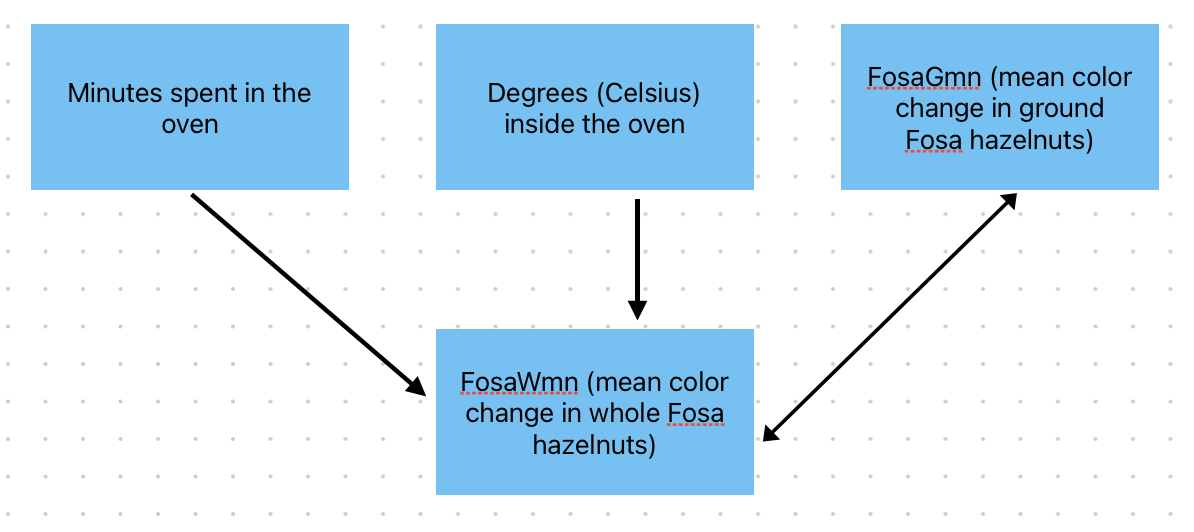

#Plots of my data

(array([3., 0., 1., 2., 6., 3., 4., 2., 3., 2.]),
 array([67.1  , 68.646, 70.192, 71.738, 73.284, 74.83 , 76.376, 77.922,
        79.468, 81.014, 82.56 ]),
 <BarContainer object of 10 artists>)

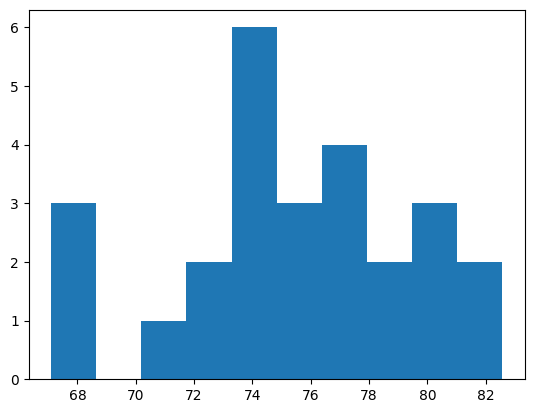

In [33]:
#just for funsies basically
#I want to know what kind of estimand data I'm working with here + its trends
plt.hist(dataframe1.fosaWmn)

In [34]:
features = ["tempC", "minutes", "fosaGmn"]

X = dataframe1[features].to_numpy()#.reshape(-1, 1)
Y = dataframe1["fosaWmn"].astype(int)#.to_numpy()
Y = pd.to_numeric(dataframe1["fosaWmn"], errors='coerce') #this line came from ChatGPT

The next three scatter plots are for me to get an idea of the basic trends going on here. This likely won't affect how I build my model, but it is useful to my understanding of the data, which I really should have.

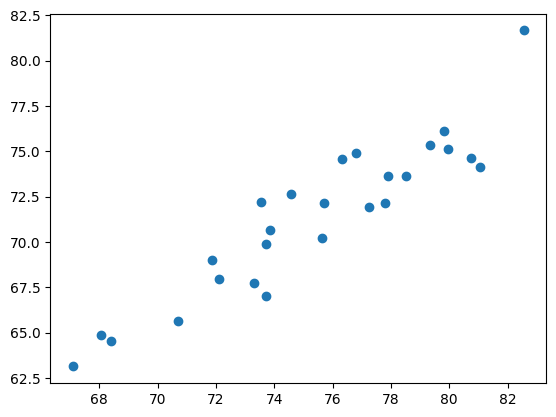

In [35]:
plt.scatter(dataframe1["fosaWmn"],dataframe1["fosaGmn"])

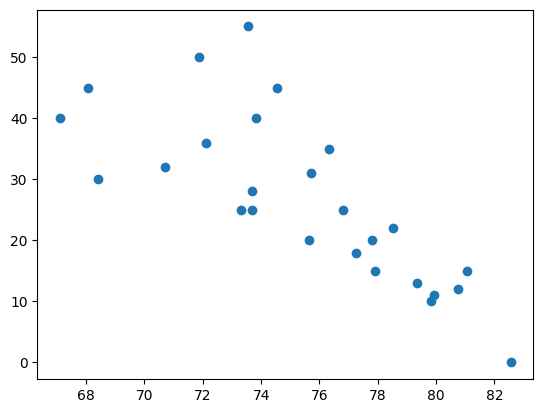

In [36]:
plt.scatter(dataframe1["fosaWmn"],dataframe1["minutes"])

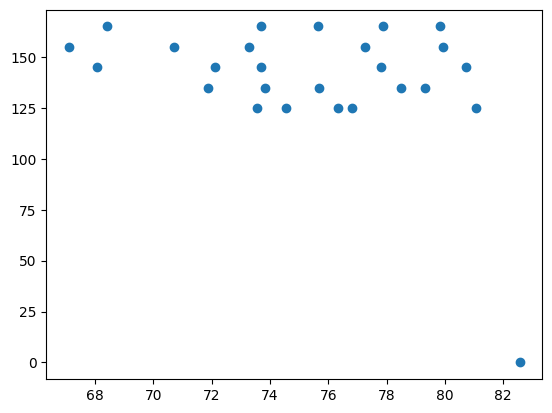

In [37]:
plt.scatter(dataframe1["fosaWmn"],dataframe1["tempC"])

#Nonlinear multilayer NN

In [38]:
#this is from Malcolm to change my columns from objects to ints

Xint = X.astype(int)

In [39]:
#convert to numpy array
s_matrix = dataframe1.to_numpy()
#convert features to a PyTorch tensor
s_tensor = torch.from_numpy(s_matrix).float()

In [56]:
X1 = s_tensor[:, [0, 1, 4]] #use tempC, minutes, and fosaGmn as predictors- columns 0, 1, and 4 of dataframe1
y = s_tensor[:,2].unsqueeze(dim=1) #fosaWmn, column 2 of dataframe1 as my estimand.

# 80% of data is training, 20% is testing
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

#I was having stupid errors with array size, so these print debug methods were necessary
print(f"Shape of X1 after correct column selection: {X1.shape}")
print(f"Shape of y after correct column selection: {y.shape}")

Shape of X1 after correct column selection: torch.Size([26, 3])
Shape of y after correct column selection: torch.Size([26, 1])


In [41]:
# all from Gemini (didn't use)

#print("Applying StandardScaler (Standardization to mean 0, std 1):")
#scaler_standard = StandardScaler()
#Xscaled = scaler_standard.fit_transform(X)

#print("Scaled Data (Standard):")
#print(Xscaled)

# Check ranges after scaling
#mean_values_standard = np.mean(Xscaled, axis=0)
#std_values_standard = np.std(Xscaled, axis=0)
#print("Mean values per feature (Standard):", mean_values_standard.round(2)) # Should be all close to 0
#print("Std Dev values per feature (Standard):", std_values_standard.round(2)) # Should be all close to 1

In [54]:
# all from Gemini to fix my exploding gradients

scaler_X = StandardScaler()
X_train_scaled = torch.tensor(scaler_X.fit_transform(X_train.numpy()), dtype=torch.float32)
X_test_scaled = torch.tensor(scaler_X.transform(X_test.numpy()), dtype=torch.float32)

scaler_y = StandardScaler()
y_train_scaled = torch.tensor(scaler_y.fit_transform(y_train.numpy()), dtype=torch.float32)
y_test_scaled = torch.tensor(scaler_y.transform(y_test.numpy()), dtype=torch.float32) # y_test_scaled is a PyTorch tensor here!

In [43]:
# Two layer nn with nn.Sequential
model_1 = nn.Sequential(
    #our input is 3 vectors, so 3 dimensions.
    nn.Linear(in_features=3, out_features=32,),
    nn.RReLU(),

    #hidden layer with 32 nodes
    nn.Linear(in_features=32, out_features=16, ),
    nn.RReLU(),

    #moves to hidden layer with 16 nodes
    nn.Linear(in_features=16, out_features=8, ),
    nn.RReLU(),

    #hidden layer with 8 nodes
    nn.Linear(in_features=8, out_features=4, ),
    nn.RReLU(),

    #hidden layer with 4 nodes
    nn.Linear(in_features=4, out_features=1, ),
    #outputs a vector of predicted weights
)

In [57]:
# Create a loss function
loss_fn = nn.MSELoss()

# Create an optimizer; SGD is stochastic gradient decent
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001) #this is how fast it optimizes; smaller is slower, but more consistent

In [45]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()
# fixing all my train and test vars to avoid the issue of trying to matmul long and float types together

In [60]:
epochs = 20000

for epoch in range(epochs):
    ### Training

    #this allows our matrices to update
    model_1.train()

    # 1. Forward pass; makes predictions
    y_pred = model_1(X_train)

    # 2. Calculate loss; how bad were our predictions?
    loss = loss_fn(y_pred.squeeze(), y_train)

    # 3. Optimizer zero grad; resets how we change our model
    optimizer.zero_grad()

    # 4. Loss backwards; determines how to change our weights matrix
    loss.backward()

    # from Gemini:
    clip_value = 5.0
    torch.nn.utils.clip_grad_norm_(model_1.parameters(), clip_value)

    # 5. Optimizer step; changes our weights matrix based on .backward()
    optimizer.step()

    ### Testing
    model_1.eval() #forces our matrices to stay the same
    with torch.inference_mode():
      # 1. Forward pass; makes predictions, but with test data
      test_pred = model_1(X_test)
      # 2. Calculate the loss, but with test data
      test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % (epochs/10) == 0: #prints every 2000 epochs
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 16.99879, Test loss: 19.52751
Epoch: 2000 | Train loss: 16.71112, Test loss: 19.88868
Epoch: 4000 | Train loss: 16.70279, Test loss: 20.15639
Epoch: 6000 | Train loss: 16.73265, Test loss: 20.31420
Epoch: 8000 | Train loss: 16.72567, Test loss: 20.59994
Epoch: 10000 | Train loss: 16.79237, Test loss: 20.62434
Epoch: 12000 | Train loss: 16.67857, Test loss: 20.97969
Epoch: 14000 | Train loss: 16.58679, Test loss: 20.93924
Epoch: 16000 | Train loss: 16.59874, Test loss: 20.94316
Epoch: 18000 | Train loss: 16.76148, Test loss: 21.08800


In [62]:
#also a debug method to make sure there were no NaNs in my training data
#because for a long time my model was outputting nothing but NaNs
print(torch.isnan(X_train).any(), torch.isinf(X_train).any())
print(torch.isnan(y_train).any(), torch.isinf(y_train).any())

tensor(False) tensor(False)
tensor(False) tensor(False)


In [48]:
# Turn on evaluation mode
model_1.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds_squeezed_tensor = y_preds.squeeze()

Shape of y_preds_scaled (PyTorch tensor from model): torch.Size([6, 1])
Type of y_preds_scaled: <class 'torch.Tensor'>
Shape of y_preds_original_scale_np (NumPy after inverse_transform): (6, 1)
Type of y_preds_original_scale_np: <class 'numpy.ndarray'>
Shape of y_test_original_scale_np (NumPy after inverse_transform): (6, 1)
Type of y_test_original_scale_np: <class 'numpy.ndarray'>
Shape of X_test_for_plotting_np: (6, 3)
Type of X_test_for_plotting_np: <class 'numpy.ndarray'>
Shape of y_test_np (final squeezed NumPy for plotting): (6,)
Shape of y_preds_np (final squeezed NumPy for plotting): (6,)


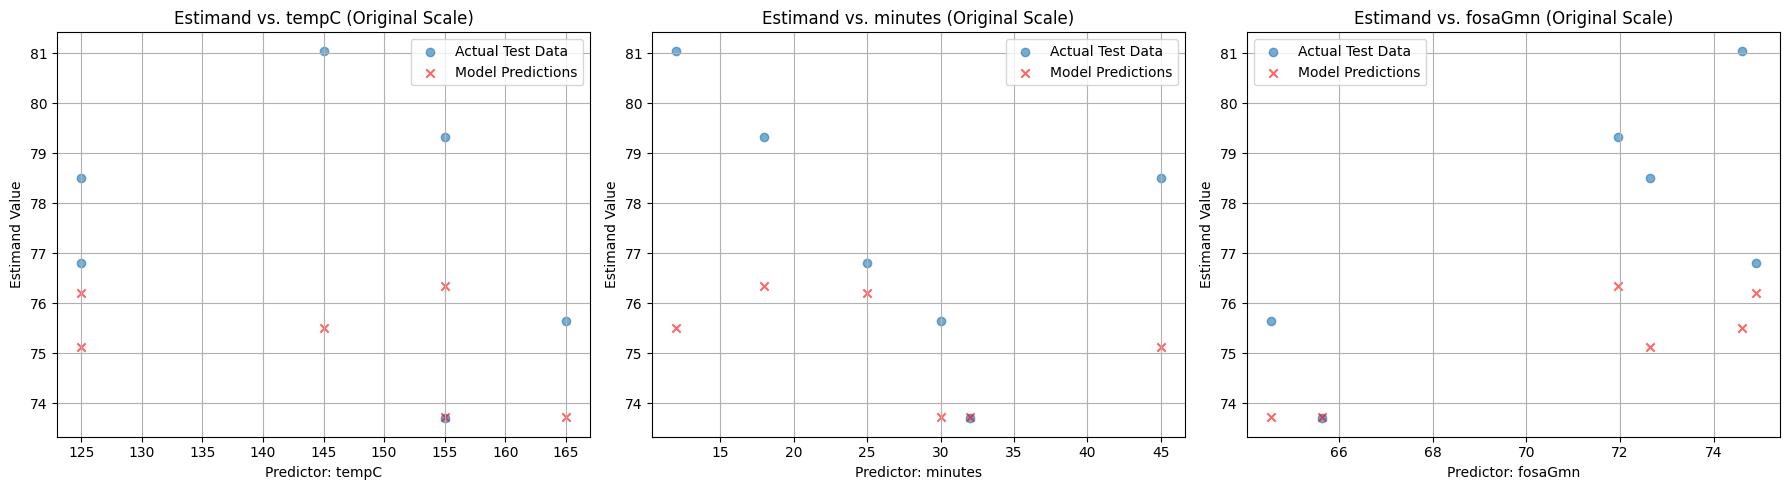

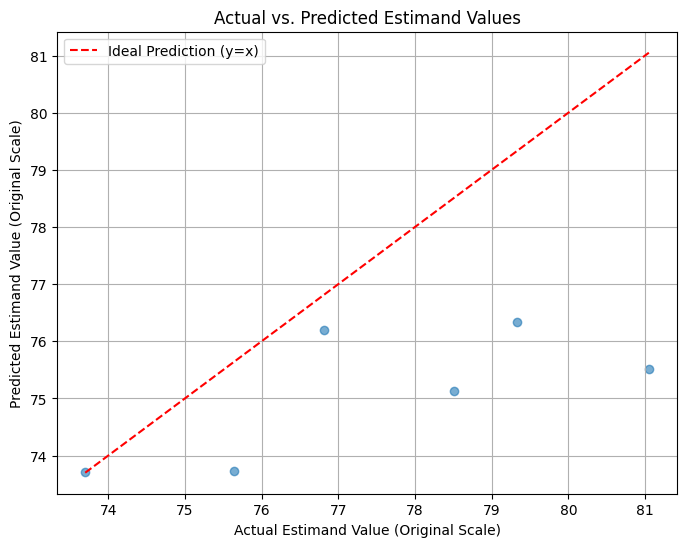

In [63]:
# from Gemini, because I forgot how to make three different plots


model_1.eval() # Set model to evaluation mode
with torch.no_grad():
    # y_preds_scaled will be a PyTorch tensor, because X_test_scaled is a PyTorch tensor
    # and model_1 outputs PyTorch tensors.
    y_preds_scaled = model_1(X_test_scaled)
    print(f"Shape of y_preds_scaled (PyTorch tensor from model): {y_preds_scaled.shape}")
    print(f"Type of y_preds_scaled: {type(y_preds_scaled)}")


# Inverse transform predictions and actual test targets back to original scale
# YOU MUST CONVERT TO NUMPY *BEFORE* CALLING INVERSE_TRANSFORM
# AND THEN OPTIONALLY BACK TO TENSOR IF YOU NEED THEM AS TENSORS LATER
y_preds_original_scale_np = scaler_y.inverse_transform(y_preds_scaled.detach().cpu().numpy())
y_test_original_scale_np = scaler_y.inverse_transform(y_test_scaled.detach().cpu().numpy()) # y_test_scaled is a PyTorch tensor

print(f"Shape of y_preds_original_scale_np (NumPy after inverse_transform): {y_preds_original_scale_np.shape}")
print(f"Type of y_preds_original_scale_np: {type(y_preds_original_scale_np)}")
print(f"Shape of y_test_original_scale_np (NumPy after inverse_transform): {y_test_original_scale_np.shape}")
print(f"Type of y_test_original_scale_np: {type(y_test_original_scale_np)}")


# --- Ensure all tensors are on CPU and converted to NumPy, and SQUEEZED ---
# X_test_for_plotting_np: Use the original (unscaled) X_test PyTorch tensor and convert it to NumPy
X_test_for_plotting_np = X_test.detach().cpu().numpy()
print(f"Shape of X_test_for_plotting_np: {X_test_for_plotting_np.shape}")
print(f"Type of X_test_for_plotting_np: {type(X_test_for_plotting_np)}")


# y_test_np and y_preds_np will be the *squeezed* NumPy arrays ready for plotting
y_test_np = y_test_original_scale_np.squeeze()
y_preds_np = y_preds_original_scale_np.squeeze()

print(f"Shape of y_test_np (final squeezed NumPy for plotting): {y_test_np.shape}")
print(f"Shape of y_preds_np (final squeezed NumPy for plotting): {y_preds_np.shape}")


# --- 8. Plotting Section (rest of the code remains the same) ---
feature_names = ['tempC', 'minutes', 'fosaGmn']

fig, axes = plt.subplots(1, X_test_for_plotting_np.shape[1], figsize=(18, 5))

if X_test_for_plotting_np.shape[1] == 1:
    axes = [axes]

for i in range(X_test_for_plotting_np.shape[1]):
    ax = axes[i]

    ax.scatter(X_test_for_plotting_np[:, i], y_test_np, label='Actual Test Data', alpha=0.6)
    ax.scatter(X_test_for_plotting_np[:, i], y_preds_np, label='Model Predictions', alpha=0.6, marker='x', color='red')

    ax.set_xlabel(f'Predictor: {feature_names[i]}')
    ax.set_ylabel('Estimand Value')
    ax.set_title(f'Estimand vs. {feature_names[i]} (Original Scale)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_preds_np, alpha=0.6)
plt.plot([y_test_np.min(), y_test_np.max()],
         [y_test_np.min(), y_test_np.max()],
         'r--', label='Ideal Prediction (y=x)')
plt.xlabel("Actual Estimand Value (Original Scale)")
plt.ylabel("Predicted Estimand Value (Original Scale)")
plt.title("Actual vs. Predicted Estimand Values")
plt.legend()
plt.grid(True)
plt.show()

#Conclusion
So these predictions are... not good. I've worked over it a hundred times just getting it to work, and ensuring that I was even using the right columns in my data splitting (which at first I very much was not), and at this point I'm willing to accept that my model just did machine learning kind of poorly.

It's really interesting that the predictions are spot-on for the single lowest estimated color value, and then begins to diverge from the actual data significantly. I'm guessing that's because my actual predicted data has a lower slope than it ideally should have. At low values, it's easier for data points on lines of different slopes to match up better, which I'm guessing is why they're more similar for that lowest value.

#Prior iterations
Finally, links to my previous versions of this project:
[Edition 1](https://colab.research.google.com/drive/1_MkJM20CxF1mCUqr702fDGwK9kJmApxa?usp=sharing), and [Edition 2](https://colab.research.google.com/drive/1f34TNbOF1f26rX_QY8j5s3PgYaOXyTxT?usp=sharing). Enjoy looking through my worse versions of this project. :)
